## Unspoiled - Find Color Range
#### Ben Cobb

Spring 2024

## Imports and Libraries

In [2]:
import cv2 as cv
import numpy as np
import math
from PIL import Image
from matplotlib import pyplot as plt

# Global Variables

In [3]:
# This is the overall path, change this to wherever the project is saved on your system
path = "/Users/molte/OneDrive/Desktop/UAFS/~Spring 2024/Capstone/images/"

cmap = "gray"

# Methods

### ...to find the min/max/avg colors

In [4]:
# Reshapes and resizes the image, given an image path
def resize(imgPath):
    
    loadImg = loadpath + imgPath
    img = cv.imread(loadImg)  # Reads in the image from the load path
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Converts it from OpenCV's BGR to normal RGB
    
    yrows, xcols, dim = img.shape
    
    # Determine the size of the black background
    maxDim = max(yrows, xcols)
    black = np.zeros((maxDim, maxDim, 3), dtype=img.dtype)
    
    # Calculate coordinates to place the original image centered on the black background
    offsetY = (maxDim - yrows) // 2
    offsetX = (maxDim - xcols) // 2
    
    # Place original image on black background centered
    black[offsetY:offsetY+yrows, offsetX:offsetX+xcols] = img
    
    # Use the centered image for further processing
    img = black
    
    # Resizes the image
    resized = cv.resize(img, (int(maxDim / 4), int(maxDim / 4)))
    
    return resized

In [5]:
# Finds the min values
def findMins(channels, limit):

    rs = channels[0]
    gs = channels[1]
    bs = channels[2]
    
    mins = np.zeros(3)
    
    count = 0
    for i in range(256):
        
        if count < limit:
            count += rs[i]
        else:
            mins[0] = i
            break
    
    count = 0
    for i in range(256):
        
        if count < limit:
            count += gs[i]
        else:
            mins[1] = i
            break
    
    count = 0
    for i in range(256):
        
        if count < limit:
            count += bs[i]
        else:
            mins[2] = i
            break

    return mins

In [6]:
# Finds the max values
def findMaxs(channels, limit):

    rs = channels[0]
    gs = channels[1]
    bs = channels[2]
    
    maxs = np.zeros(3)

    count = 0
    for i in range(255, -1, -1):
        
        if count < limit:
            count += rs[i]
        else:
            maxs[0] = i
            break
    
    count = 0
    for i in range(255, -1, -1):
        
        if count < limit:
            count += gs[i]
        else:
            maxs[1] = i
            break
    
    count = 0
    for i in range(255, -1, -1):
        
        if count < limit:
            count += bs[i]
        else:
            maxs[2] = i
            break

    return maxs

In [7]:
# Displays two images next to each other
def showImage(img):
    
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))
    
    axes.axis('off')
    axes.set_title("Image")
    
    axes.imshow(img, cmap, vmin=0, vmax=255)

In [8]:
# Creates the necessary folders
def createFolders():
    
    if not os.path.exists(loadpath):
        os.makedirs(loadpath)
    if not os.path.exists(savepath):
        os.makedirs(savepath)
    if not os.path.exists(labelpath):
        os.makedirs(labelpath)
    if not os.path.exists(boxpath):
        os.makedirs(boxpath)

In [9]:
# Writes box info to a .txt file
def writeBoxCoords(boxes, txtpath):

    label = open(txtpath, "w")
    for line in boxes:
    
        # Format: (classID, x_center, y_center, width, height)
        out = f"{line[0]} {line[1]:.6f} {line[2]:.6f} {line[3]:.6f} {line[4]:.6f}" 
        
        label.write(out + "\n")

    label.close()

In [10]:
# Saves the altered images and writes their bounding box coords
def saveAndWrite(images, allBoxes, imgPath):  
    imgName = imgPath[:-4]
    writeName = imgName + ".txt"
    
    count = 0
    boxCount = 0
    for img in images:

        # Setting up consistent filenames
        newName = imgName + "-" + str(count)
        newImgName = newName + ".png"
        newWriteName = newName + ".txt"
        
        imgTest = img.copy()
        boxes = allBoxes[boxCount]
        
        dim = imgTest.shape[0]
        ##############################
        # Calculates the actual pixels
        for box in boxes:
            
            x = box[1] * dim
            y = box[2] * dim
            w = box[3] * dim
            h = box[4] * dim
            
            topleft = (int(x - w/2), int(y - h/2))
            bottomright = (int(x + w/2), int(y + h/2))
    
            # Draws bounding rectangle
            cv.rectangle(imgTest, topleft, bottomright, (50, 205, 50), 2)         

        ##############################
                
        imgBGR = cv.cvtColor(img, cv.COLOR_RGB2BGR)  # Converts it from OpenCV's BGR to normal RGB
        imgBGRTest = cv.cvtColor(imgTest, cv.COLOR_RGB2BGR)  # Converts it from OpenCV's BGR to normal RGB
        
        cv.imwrite(savepath + newImgName, imgBGR)
        cv.imwrite(boxpath + newImgName, imgBGRTest)

        writeBoxCoords(allBoxes[boxCount], labelpath + newWriteName)
        
        count += 1
    
        if count % 4 == 0:
            boxCount += 1

    return count

In [11]:
# Displays two images next to each other
def showManipulatedImages(images):
    
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
            
    axes[0][0].set_title("Original")
    axes[0][1].set_title("Blurred")
    axes[0][2].set_title("Jittered 1")
    axes[0][3].set_title("Jittered 2")

    axes[1][0].set_title("Flipped")
    axes[1][1].set_title("Blurred")
    axes[1][2].set_title("Jittered 1")
    axes[1][3].set_title("Jittered 2")

    axes[2][0].set_title("Flipped")
    axes[2][1].set_title("Blurred")
    axes[2][2].set_title("Jittered 1")
    axes[2][3].set_title("Jittered 2")

    axes[3][0].set_title("Flipped")
    axes[3][1].set_title("Blurred")
    axes[3][2].set_title("Jittered 1")
    axes[3][3].set_title("Jittered 2")

    count = 0
    for i in range(4):
        for j in range(4):
            axes[i][j].axis('off')
            axes[i][j].imshow(images[count], cmap, vmin=0, vmax=255)
            count += 1
                
    plt.tight_layout()

In [12]:
# Test displays bounding boxes on new images
def testBoxes(images, allBoxes):
    
    # Testing the bounding boxes on the new images
    imgTests = []
    
    count = 0
    boxCount = 0
    for img in images:
    
        imgTest = img.copy()
        boxes = allBoxes[boxCount]
    
        dim = imgTest.shape[0]
    
        ##############################
        # Calculates the actual pixels
        for box in boxes:
            
            x = box[1] * dim
            y = box[2] * dim
            w = box[3] * dim
            h = box[4] * dim
            
            topleft = (int(x - w/2), int(y - h/2))
            bottomright = (int(x + w/2), int(y + h/2))
    
            # Draws bounding rectangle
            cv.rectangle(imgTest, topleft, bottomright, (50, 205, 50), 2)         
    
        imgTests.append(imgTest)
        ##############################
        
        count += 1
        if count % 4 == 0:
            boxCount += 1

    return imgTests

# Image Test

/Users/molte/OneDrive/Desktop/UAFS/~Spring 2024/Capstone/images/sodatest.png


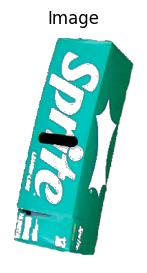

In [16]:
# Loads the image
imgName = "sodatest.png" # CHANGE THIS ONLY
loadpath = path + imgName
print(loadpath)

img = Image.open(loadpath)
array = np.array(img)

showImage(img)

In [17]:
# Get pixel counts
rs = np.zeros(256, dtype="uint8")
gs = np.zeros(256, dtype="uint8")
bs = np.zeros(256, dtype="uint8")

channelR = array[:,:,0].flatten()
channelG = array[:,:,1].flatten()
channelB = array[:,:,2].flatten()
alpha = array[:,:,3].flatten()

count = 0
for i in range(len(alpha)):

    if alpha[i] > 0:
        
        pxlR = channelR[i]
        pxlG = channelG[i]
        pxlB = channelB[i]
        
        rs[pxlR] += 1
        gs[pxlG] += 1
        bs[pxlB] += 1

        count += 1

In [19]:
# Finds the mins and maxs
percMin = .05
percMax = .01
limitMin = round(count * percMin)
limitMax = round(count * percMax)

channels = [rs, gs, bs]

mins = findMins(channels, limitMin)
maxs = findMaxs(channels, limitMax)

print(mins)
print(maxs)

[17. 97. 68.]
[ 96. 220. 219.]
